<a href="https://colab.research.google.com/github/joanglaunes/BME_Math_Advanced/blob/main/Practical1_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BME-Paris Master - UE Math 2 ##
# Practical session 1 : signal and image denoising #

In this session we will use
differential calculus and gradient descent to perform
denoising of signals and images.

We first download the auxiliary files and import the relevent packages :

In [88]:
!wget -q https://github.com/joanglaunes/BME_Math_Advanced/blob/main/brain.png?raw=true -O brain.png
!wget -q https://raw.githubusercontent.com/joanglaunes/BME_Math_Advanced/refs/heads/main/autodiff.py

import numpy as np
import matplotlib.pyplot as plt

We load the test image
`brain.png` and display it:

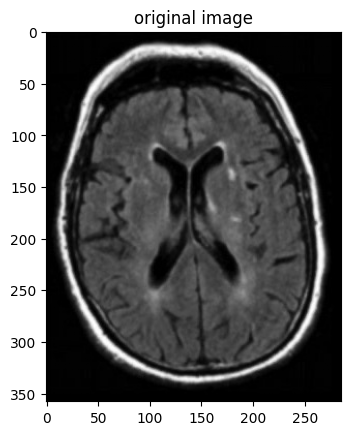

In [89]:
# load the image file into the Python session
v_org = plt.imread('brain.png')

# display the image and add a title
plt.imshow(v_org, cmap='gray', vmin=0, vmax=1)
plt.title('original image');

Now we can add noise to simulate a bad acquisition:

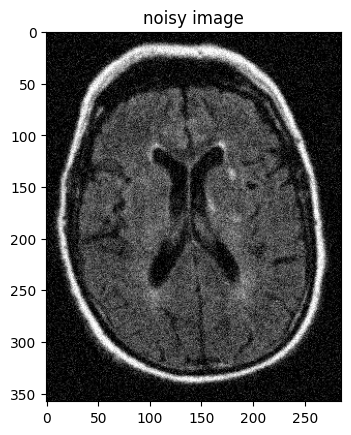

In [90]:
# add random white noise with normal distribution of standard deviation 0.1
v = v_org + 0.1 * np.random.randn(*v_org.shape);

# display the image
plt.imshow(v, cmap='gray', vmin=0, vmax=1)
plt.title('noisy image');

In a first part we will concentrate on denoising a single row of the image. Such a signal can be extracted from the images and plotted as follows:

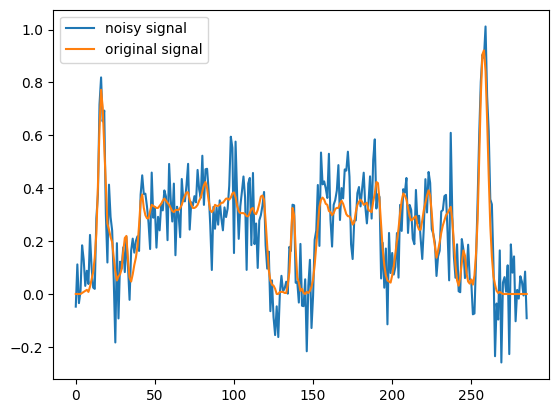

In [91]:
# extract row 150 of the noisy image
y = v[150,:]
# extract row 150 of the original image
y_org = v_org[150,:];

# display the signals
plt.plot(y)
plt.plot(y_org)
plt.legend(('noisy signal','original signal'));

## 1D signal denoising ##

$\newcommand{\R}{{\mathbb R}}$
Let $y=(y_1,y_2,\ldots,y_n)\in\R^n$ be a discrete 1D signal, which we suppose to be noisy. We will first denoise this signal by minimizing the following function:
we define for every $x\in\R^n$,
$$f(x)=\sum_{i=1}^n(x_i-y_i)^2+\alpha\sum_{i=1}^{n-1}(x_{i+1}-x_i)^2,$$
where $\alpha>0$
is a fixed parameter.
Minimization of this function will be performed using the gradient descent algorithm with fixed stepsize.

To go further we need to write the function which will compute the value of the functional and get its gradient.

**Question 1:** Write a function `f(x,y,alpha)`
which computes the value of $f(x)$ for an input vector $x$.  Using vector functions `np.diff` and `np.sum`
,  you can avoid using any loop. This will result in a much more concise and also faster code.

In [92]:
def f(x,y,alpha):
  n = len(x)
  S = 0
  for i in range(n):
    S = S + (x[i]-y[i])**2
  for i in range(n-1):
    S = S + alpha*(x[i+1]-x[i])**2
  return S

# simpler and faster version:
def f(x,y,alpha):
    return np.sum((x-y)**2) + alpha * np.sum(np.diff(x)**2)

# example of use : we compute the value of function f when alpha=0.1 and with x=y_org :
print(f(y_org,y,0.1))

3.0962774886162787


Using the automatic differentiation tool `autodiff`, we can avoid to write the expression of the derivatives, and directly compute the gradient of function $f(x)$ as follows :

In [93]:
from autodiff import grad

g=grad(f)(y_org,y,0.1) # this computes the gradient of f with respect to the first input
g

array([ 0.09554865, -0.22371468,  0.06896568, -0.02175247, -0.3604838 ,
       -0.24576291, -0.03778487, -0.14189132, -0.06537233, -0.39345622,
       -0.09106504,  0.11077902,  0.22869666, -0.13397184,  0.05660117,
       -0.16310945, -0.05095932,  0.12261454, -0.2721347 ,  0.18595274,
        0.27322876, -0.33982074, -0.15259646, -0.07959202,  0.16441695,
        0.5361034 , -0.2926807 ,  0.31984538, -0.09783363, -0.01503834,
       -0.02821681,  0.2664825 ,  0.02733964,  0.03293397,  0.16019067,
       -0.24292162, -0.2712803 , -0.09190277, -0.13011807, -0.08269447,
        0.18885295, -0.03141977, -0.12979725, -0.10983131, -0.16572848,
       -0.09283791,  0.02979689,  0.28826448, -0.23840593,  0.08982092,
        0.00170642,  0.29950598,  0.06588505,  0.18523955,  0.00277599,
        0.07409582, -0.05858556, -0.03215224,  0.2831186 , -0.30850986,
       -0.06652075,  0.07745974, -0.21787106,  0.34367266, -0.02481323,
        0.03416239,  0.22086763, -0.19690134,  0.01068262,  0.04

We can now try the gradient descent algorithm and visualize the result.

**Question 2:** Write a script which performs $N=100$ iterations of the gradient descent algorithm on $f$ with $\alpha=5$ and stepsize $\eta=0.01$, and plot the denoised signal `x`. Additionally you can store the sequence of values of the functional at each iteration and plot it in a separate figure. Also try different values for the parameter $\alpha$.

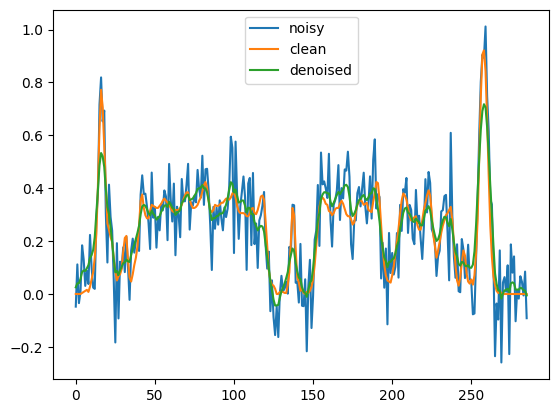

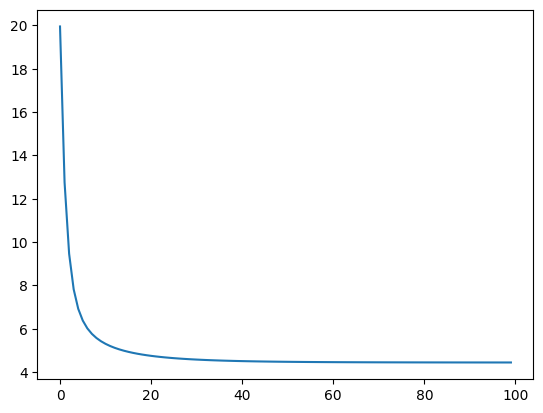

In [99]:
# set parameters
N = 100
alpha = 5
eta = 0.01

# perform gradient descent
x = y
values_f = np.zeros(N)
for k in range(N):
  x = x - eta * grad(f)(x,y,alpha)
  values_f[k] = f(x,y,alpha)

# plot results
plt.plot(y)
plt.plot(y_org)
plt.plot(x)
plt.legend(('noisy','clean','denoised'))
plt.show()

plt.plot(values_f);

**Question 3:** In this question we will show that gradient descent was in fact not needed for minimizing the function $f$, because the minimizer can be found by looking at optimality conditions.
- Show that $f(x)$ can be written in the form $f(x)=\|x-y\|^2+\lambda\|Ax\|^2$, where $A$ is a $(n-1)\times n$ matrix to be found.
- Compute the expression of the gradient $\nabla f(x)$.
- Show that the equation $\nabla f(x)=0$ leads to a linear system which can be written in matrix form $Mx=b$, for some matrix $M$ and vector $b$.
- Use Python to solve the system and plot the signal $x$ found.
- Explain why this $x$ (solution of $Mx=b$) is the global minimizer of $f$.

We now consider an alternative function $h$ to be minimized for denoising the signal:
$$h(x)=\sum_{i=1}^n(x_i-y_i)^2+\alpha\sum_{i=1}^{n-1}\sqrt{\varepsilon+(x_{i+1}-x_i)^2},$$
where $\varepsilon>0$
is another positive parameter (supposed to be close to $0$).

Minimizing $h$ instead of $f$ will give a different denoised signal, with different properties. The real benefit of using $h$ instead of $f$ will be clear when dealing with images in the next part.

To minimize $h$, the direct approach as in question 3 is no longer possible, so we will use gradient descent.

**Question 4:** Proceed as in questions 1 and 2, replacing function $f$ by this new function $h$. Perform $N=500$ iterations of the gradient descent on $h$ with these choices of parameters: $\alpha=0.5$, $\eta=0.001$ and $\varepsilon=10^{-8}$. Plot the denoised signal and compare with the previous result.

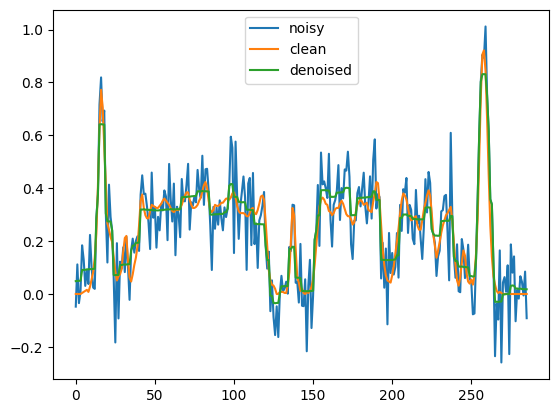

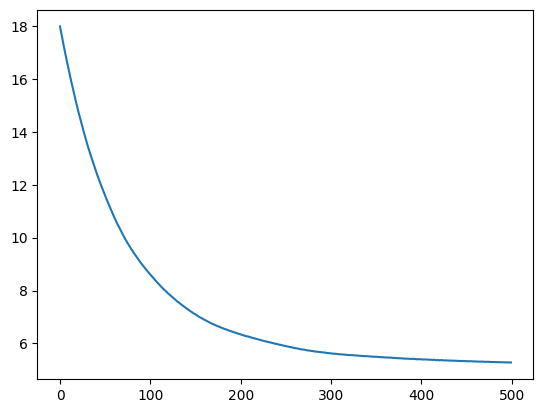

In [100]:
def h(x,y,alpha,epsilon):
    return np.sum((x-y)**2) + alpha * np.sum(np.sqrt(epsilon+np.diff(x)**2))

# set parameters
N = 500
alpha = 0.5
eta = 0.001
epsilon = 1e-8

# perform gradient descent
x = y
values_h = np.zeros(N)
for k in range(N):
  x = x - eta * grad(h)(x,y,alpha,epsilon)
  values_h[k] = h(x,y,alpha,epsilon)

# plot results
plt.plot(y)
plt.plot(y_org)
plt.plot(x)
plt.legend(('noisy','clean','denoised'))
plt.show()

plt.plot(values_h);

## Image denoising ##

$\newcommand{\eps}{\varepsilon}$

In this part signals will be 2D grayscale images. $u=(u_{ij})\in\R^{m\times n}$, where $u_{ij}$ gives intensity at pixel $(i,j)$. If $v=(v_{ij})$ is the noisy image, we now define:
\begin{eqnarray*} f(u)&=&\sum_{i=1}^m\sum_{j=1}^n(u_{ij}-v_{ij})^2+\alpha\sum_{i=1}^{m-1}\sum_{j=1}^{n-1}(u_{i+1,j}-u_{ij})^2+(u_{i,j+1}-u_{ij})^2,\\\\ h(u)&=&\sum_{i=1}^m\sum_{j=1}^n(u_{ij}-v_{ij})^2+\alpha\sum_{i=1}^{m-1}\sum_{j=1}^{n-1}\sqrt{\eps+(u_{i+1,j}-u_{ij})^2+(u_{i,j+1}-u_{ij})^2},\end{eqnarray*}

**Question 4:** Proceed as in the first part: write new functions `f` and `h` corresponding to this 2D case, and write gradient descent algorithms for the two functions. You can use the following parameters : $N=100$, $\alpha=1$, $\eta=0.01$ for $f$, and $N=200$, $\alpha=0.1$, $\eta=0.01$, $\eps=10^{-4}$ for $h$. Test the algorithms on the noisy image of the brain $v$ and
compare the two approaches.

In [ ]:
def f(u,v,alpha):
    ### to do ###

# parameters
N = 100
alpha = 1
eta = 0.01

# gradient descent
### to do ###

# display images
plt.imshow(v, cmap='gray', vmin=0, vmax=1)
plt.title('noisy')
plt.show()
plt.imshow(u, cmap='gray', vmin=0, vmax=1)
plt.title('denoised')
plt.show()

plt.plot(values_f);

In [ ]:
def h(u,v,alpha,epsilon):
    ### to do ###

# parameters
N = 200
alpha = 0.1
epsilon = 1e-4
eta = 0.01

# gradient descent
### to do ###

# display images
plt.imshow(v, cmap='gray', vmin=0, vmax=1)
plt.title('noisy')
plt.show()
plt.imshow(u, cmap='gray', vmin=0, vmax=1)
plt.title('denoised')
plt.show()

plt.plot(values_h);